In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [4]:
df = pd.read_csv("C:\kaggle Dataset\Dataset .csv")
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [6]:
 # percentage of restaurants that offer table booking
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
print('Percentage of restaurants that offer table booking:\n', table_booking_percentage)

Percentage of restaurants that offer table booking:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


In [8]:
# percentage of restaurants that offer online delivery
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
print('Percentage of restaurants that offer online delivery:\n', online_delivery_percentage)

Percentage of restaurants that offer online delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [12]:
 # Comparing the average ratings of restaurants with table booking and those without table booking
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print('Average rating of restaurants with/without table booking:\n', avg_rating_table_booking)

Average rating of restaurants with/without table booking:
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


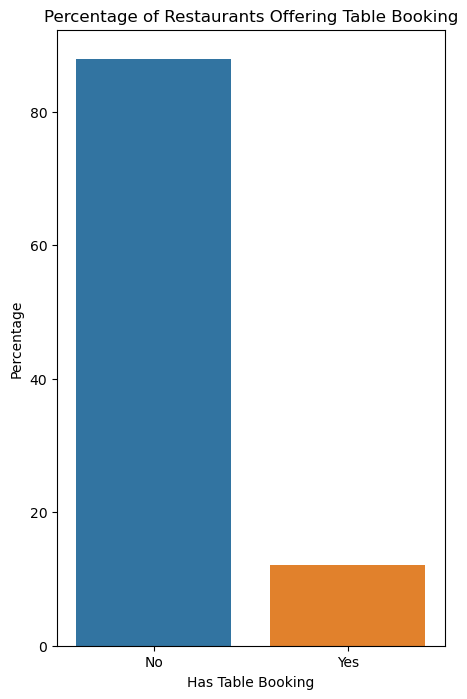

In [20]:
# Visualizations
plt.figure(figsize=(5, 8))
sns.barplot(x=table_booking_percentage.index, y=table_booking_percentage.values)
plt.title('Percentage of Restaurants Offering Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Percentage')
plt.show()

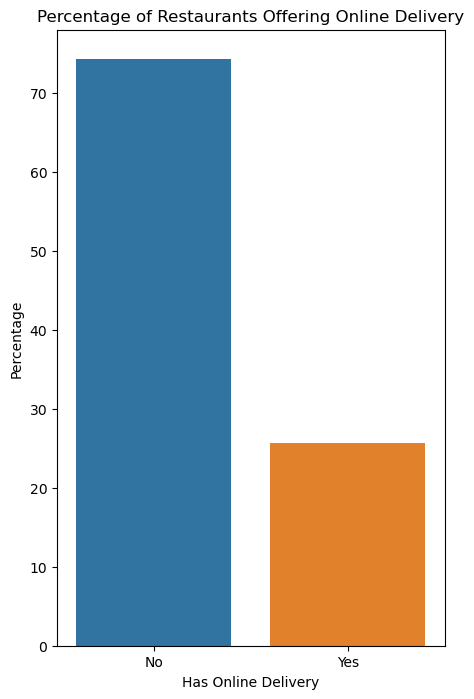

In [24]:
plt.figure(figsize=(5, 8))
sns.barplot(x=online_delivery_percentage.index, y=online_delivery_percentage.values)
plt.title('Percentage of Restaurants Offering Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Percentage')
plt.show()

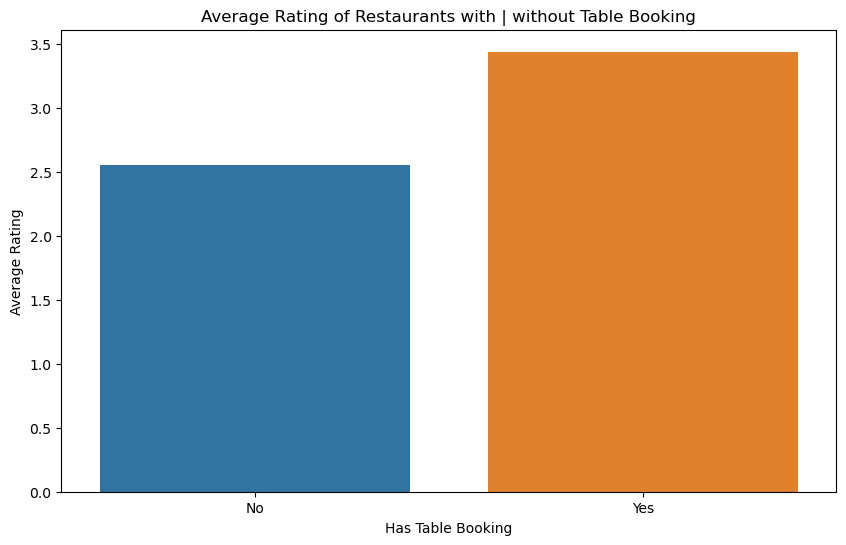

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values)
plt.title('Average Rating of Restaurants with | without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.show()

In [30]:
# TASK 2 - Determine the most common price range among all the restaurants.
         # Calculate the average rating for each price range.
          # Identify the colour that represents the highest average rating among different price ranges.

In [34]:
most_freq_range = df['Price range'].mode()[0]
print('most_freq_range:', most_freq_range)

Most common price range: 1


In [36]:
avg_rating_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print('Average rating for each price range:\n', avg_rating_price_range)

Average rating for each price range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [38]:
# Identify the colour that represents the highest average rating among different price ranges
color_avg_rating = df.groupby('Price range')['Rating color'].agg(lambda x: x.mode()[0])
print('Color representing the highest average rating for each price range:\n', color_avg_rating)

Color representing the highest average rating for each price range:
 Price range
1    Orange
2    Orange
3    Yellow
4    Yellow
Name: Rating color, dtype: object


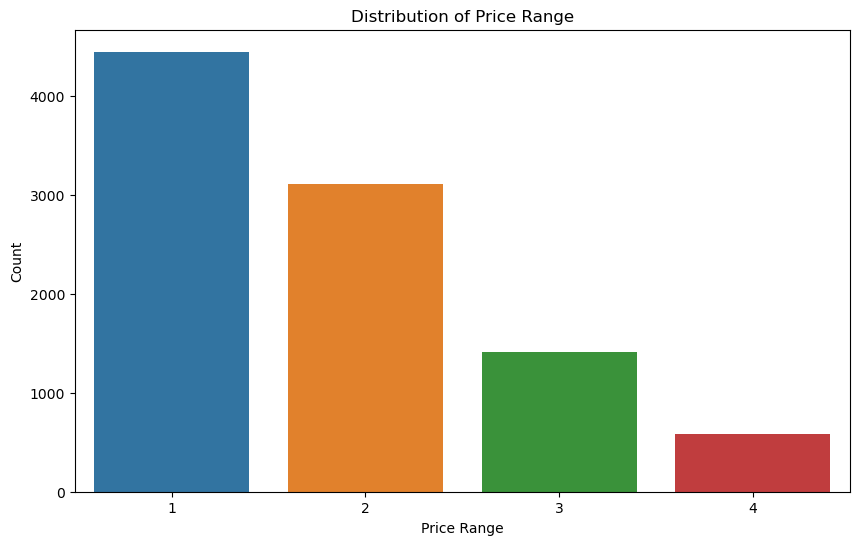

In [40]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', data=df, order=df['Price range'].value_counts().index)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

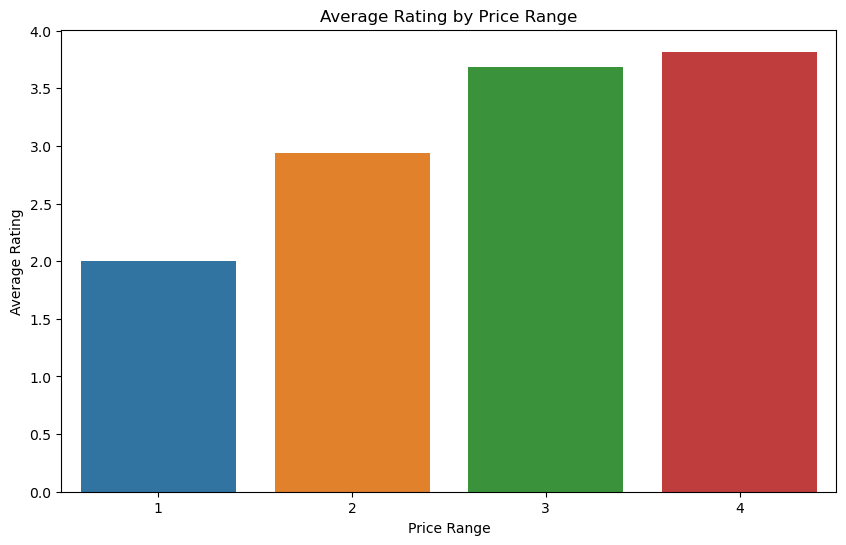

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_price_range.index, y=avg_rating_price_range.values)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

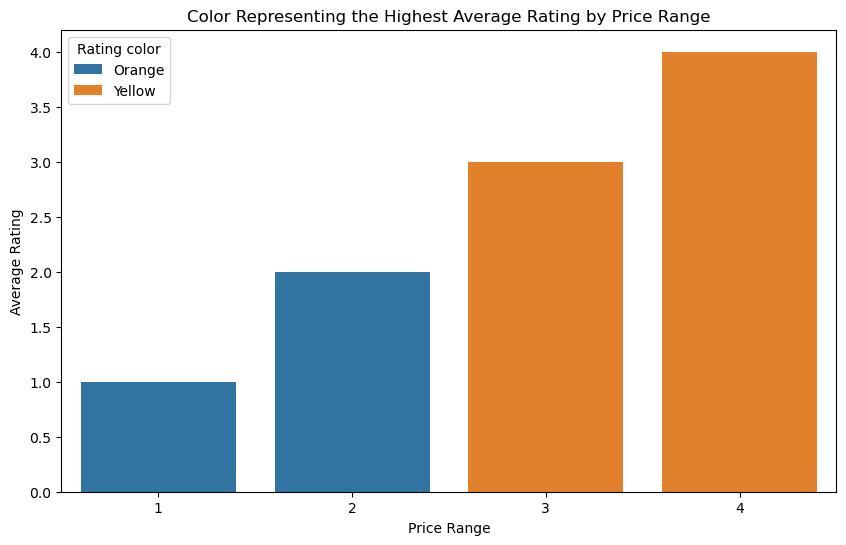

In [44]:
color_rating_df = pd.DataFrame({'Price range': avg_rating_price_range.index, 'Rating color': color_avg_rating.values})
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Price range', data=color_rating_df, hue='Rating color', dodge=False)
plt.title('Color Representing the Highest Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

In [46]:
#Task 3: Feature Engineering
# Extract additional features from the existing columns, such as the length of the restaurant name or address.
# Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [48]:
# Extract additional features from the existing columns
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
df['Address Length'] = df['Address'].apply(len)

In [50]:
# Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables
df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Has Online Delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [52]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

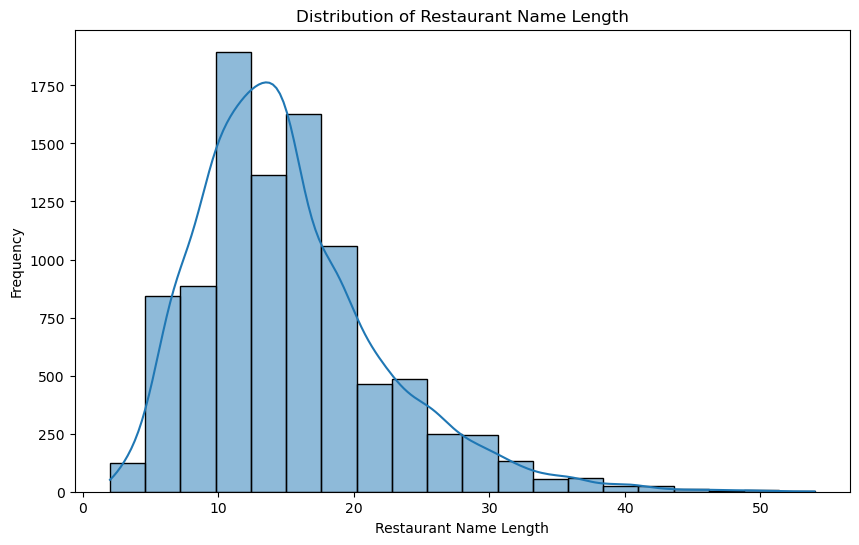

In [54]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['Restaurant Name Length'], bins=20, kde=True)
plt.title('Distribution of Restaurant Name Length')
plt.xlabel('Restaurant Name Length')
plt.ylabel('Frequency')
plt.show()

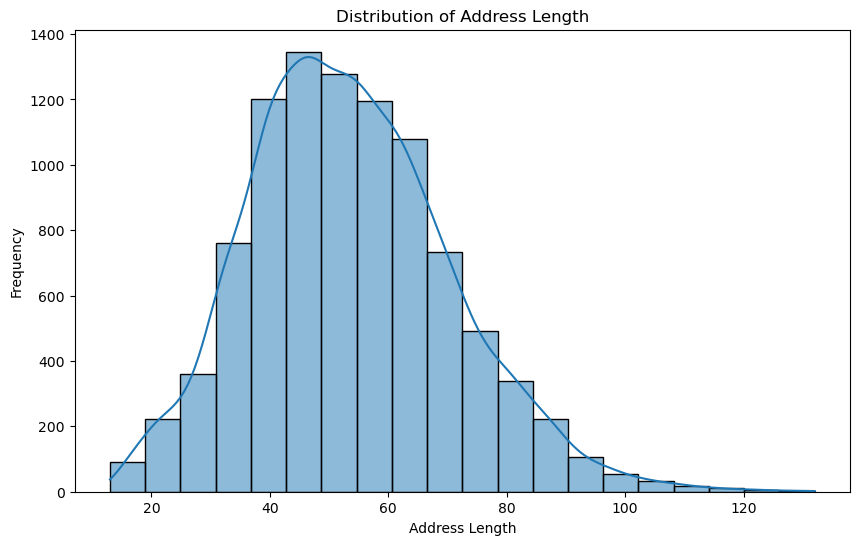

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Address Length'], bins=20, kde=True)
plt.title('Distribution of Address Length')
plt.xlabel('Address Length')
plt.ylabel('Frequency')
plt.show()

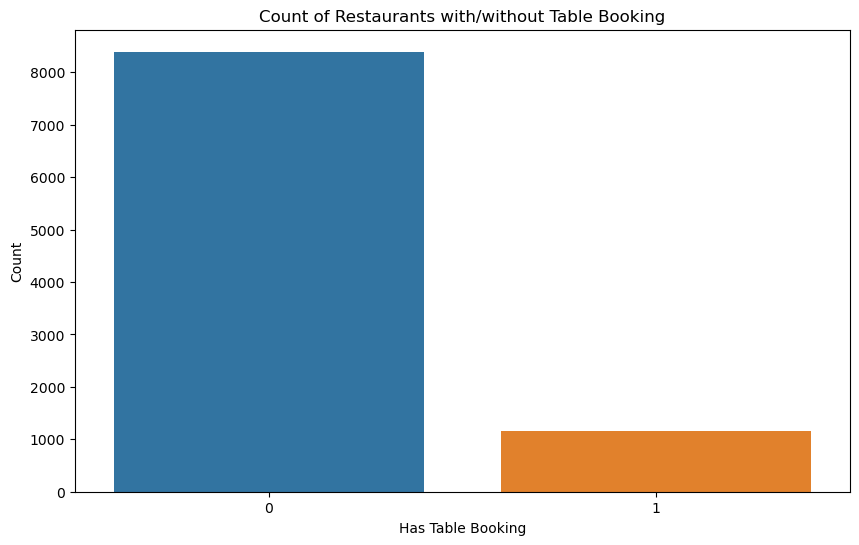

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Has Table Booking', data=df)
plt.title('Count of Restaurants with/without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Count')
plt.show()


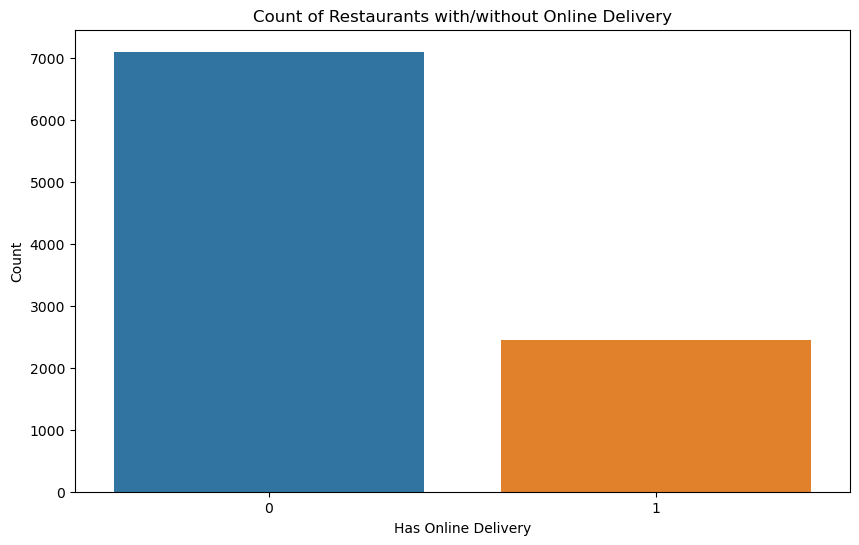

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Has Online Delivery', data=df)
plt.title('Count of Restaurants with/without Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Count')
plt.show()